# 1. Exploratory Data Analysis

This notebook will teach you how to analyse a Human Activity Recognition dataset. It will show you sample methods which one can apply to get a feel for the data and use case at hand.

## 1.1. The Dataset

Throughout the whole tutorial we will use the RealWorld HAR dataset. The dataset comprises of 15 subjects perfoming a set of 8 activites (climbing stairs up and down, jumping, lying, running/ jogging, sitting, standing, walking). The orginal dataset covers acceleration, GPS, gyroscope, light, magnetic field, and sound level data. Sensors were placed on multiple body positions, i.e. chest, forearm, head, shin, thigh, upper arm, and waist. Each subject performed each activity roughly 10 minutes except for jumping (~1.7 minutes).

For simplicity and runtime purposes we will only data obtained from the first subject. To further limit the amount of data, we chose to only use acceleration data captured from the wrist. The following code snippet will load the data will load the subset of the dataset and print the first 5 rows of it. 

In [1]:
import os
import sys
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

data_folder = '../data'
dataset = 'rwhar_sbj1_data.csv'

data = pd.read_csv(os.path.join(data_folder, dataset), names=['subject_id', 'acc_x', 'acc_y', 'acc_z', 'activity_label'])
data.head()

,subject_id,acc_x,acc_y,acc_z,activity_label
0,0,-9.57434,-2.02733,1.34506,climbing_up
1,0,-9.56479,-1.99597,1.39345,climbing_up
2,0,-9.55122,-1.98445,1.41139,climbing_up
3,0,-9.51335,-1.97557,1.42615,climbing_up
4,0,-9.52959,-1.98187,1.45395,climbing_up


As you can see, the dataset comprises of 5 columns.
- **subject_id**: identifier which subject the data belongs to
- **acc_x**: acceleration data obtained from the wrist (x-axis)
- **acc_y**: acceleration data obtained from the wrist (y-axis)
- **acc_z**: acceleration data obtained from the wrist (z-axis)
- **activity_label**: name of the activtiy which was performed

## 1.2. Visualizing the Dataset

First, we will take a closer look at the dataset at hand. In the following, we will go over sample steps you can take to get a better feeling for a dataset and how its data looks like.


Task
1. Analyse the label distribution of the dataset. What unique labels exist in the dataset? How many instances of each label are there?
2. Visualize your results obtained in 1. using a bar plot diagram.


Unique labels in the dataset:
climbing_up
standing
walking
sitting
running
climbing_down
jumping
lying

Label Distribution: 
sitting          32833
standing         31924
walking          31793
lying            31229
running          30429
climbing_up      26938
climbing_down    25281
jumping           4232
Name: activity_label, dtype: int64


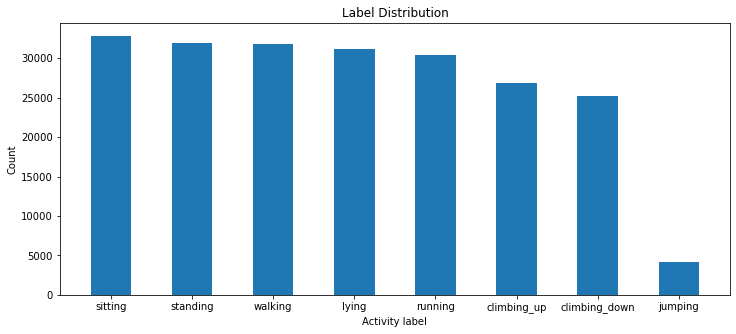

In [16]:
import numpy as np
import matplotlib.pyplot as plt

unique_labels = data['activity_label'].unique()
print('\nUnique labels in the dataset:')
for l in unique_labels: print(l)

label_distribution = data['activity_label'].value_counts()
print('\nLabel Distribution: ')
print(label_distribution)

x_axis = label_distribution.index.tolist()
y_axis = label_distribution.tolist()
plt.figure(figsize=(12, 5))
plt.bar(x_axis, y_axis, width=0.5)
plt.xlabel('Activity label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

### Task
Your next task will be to visualize all data of a sample activity. The next steps will guide you through how to define a sample function to do so called 'plot_activity'
1. Filter the original dataset to only contain records with the wanted label 
2. Define the y-axis of the plot as the sensor values, e.g. acceleration data on the x-, y- and z-axis
3. Define the x-axis of the plot as the time in seconds (Hint: you need the sampling rate).
4. Test the function for different activity labels and sensors.

In [ ]:
%matplotlib notebook
import math
import matplotlib.pyplot as plt

activity_label = 'climbing_up'
sensor_names = ['acc_x', 'acc_y', 'acc_z']
sampling_rate = 50

def plot_activity(data, activity_label, sensor_names, sampling_rate):
    filtered_data = data[data.activity_label==label]
    
    y_axis = filtered_data[sensor_names]
    x_axis = np.array(range(len(acc_x))) / sampling_rate

    plt.plot(x_axis, acc_x)

    plt.xlabel('Time (sec)')
    plt.ylabel('Sensor Value')
    plt.title(label)
    plt.show()
    
plot_activity(data, label, sensor_names, sampling_rate)

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = data['acc_x']
y = data['acc_y']
z = data['acc_z']

plt.plot(x, 'r') # plotting t, a separately 
plt.plot(y, 'b') # plotting t, b separately 
plt.plot(z, 'g') # plotting t, c separately 
plt.xlim([26939,58863])
plt.ylim([-20,20])
plt.show()

## 1.3. Analyzing the Activities

In [ ]:
from data_processing.data_analysis import analyze_window_lengths

analyze_window_lengths(labels=data['activity_label'], subject_idx=data['subject_id'], sampling_rate=50)